## Analysis of paytm transactions from Jan 2018 to Jan 2019

In [2]:
import numpy as np
import pandas as pd

In [3]:
txn = pd.read_csv('Paytm_Wallet_Txn_History.csv',parse_dates = True)

In [4]:
txn.fillna({'Debit':0,'Credit':0},inplace=True)

In [25]:
txn.describe()

,Wallet Txn ID,Debit,Credit
count,9.210000e+02,921.000000,921.000000
mean,2.023721e+10,120.961086,120.156471
std,1.420000e+09,451.813897,646.580022
min,1.761966e+10,0.000000,0.000000
25%,1.899173e+10,0.000000,0.000000
50%,2.015099e+10,50.000000,0.000000
75%,2.158271e+10,70.000000,1.500000
max,2.262234e+10,8785.000000,15000.000000


In [5]:
txn['Date']=pd.to_datetime(txn['Date'])
txn

,Date,Activity,Source/Destination,Wallet Txn ID,Comment,Debit,Credit,Transaction Breakup,Status
0,2019-01-25 10:48:57,Paid For Order,Just Dosa Tiffinys Order #201901251048560209,22622343594,NaN,50.0,0.0,NaN,SUCCESS
1,2019-01-24 21:19:43,Cashback Received,IOCL Order #2019012421194210314,22616506212,NaN,0.0,1.5,NaN,SUCCESS
2,2019-01-24 21:19:42,Paid For Order,HI TECH AUTO SERVICE Order #2019012421194210314,22616506109,NaN,200.0,0.0,NaN,SUCCESS
3,2019-01-24 21:16:11,Added To Paytm Account,Paytm Order #7159693120,22616439149,NaN,0.0,1000.0,NaN,SUCCESS
4,2019-01-23 21:13:26,Paid For Order,Shree Muthahalli Veg HSR Order #20190123211326...,22598910177,NaN,60.0,0.0,NaN,SUCCESS
5,2019-01-23 21:13:16,Added To Paytm Account,Paytm Order #7150468030,22598906847,NaN,0.0,10.0,NaN,SUCCESS
6,2019-01-23 10:29:10,Cashback Received,Paytm Order #SUPERCASH-88219437,22587071130,NaN,0.0,50.0,NaN,SUCCESS
7,2019-01-23 10:29:09,Paid For Order,Just Dosa Tiffinys Order #201901231029090014,22587070826,NaN,55.0,0.0,NaN,SUCCESS
8,2019-01-23 10:29:07,Added To Paytm Account,Paytm Order #7143629098,22587070315,NaN,0.0,8.0,NaN,SUCCESS
9,2019-01-22 21:23:31,Paid For Order,Shree Muthahalli Veg HSR Order #20190122212331...,22581647787,NaN,10.0,0.0,NaN,SUCCESS


In [6]:
txn['year'] = txn['Date'].dt.year
txn['month'] = txn['Date'].dt.month
txn

,Date,Activity,Source/Destination,Wallet Txn ID,Comment,Debit,Credit,Transaction Breakup,Status,year,month
0,2019-01-25 10:48:57,Paid For Order,Just Dosa Tiffinys Order #201901251048560209,22622343594,NaN,50.0,0.0,NaN,SUCCESS,2019,1
1,2019-01-24 21:19:43,Cashback Received,IOCL Order #2019012421194210314,22616506212,NaN,0.0,1.5,NaN,SUCCESS,2019,1
2,2019-01-24 21:19:42,Paid For Order,HI TECH AUTO SERVICE Order #2019012421194210314,22616506109,NaN,200.0,0.0,NaN,SUCCESS,2019,1
3,2019-01-24 21:16:11,Added To Paytm Account,Paytm Order #7159693120,22616439149,NaN,0.0,1000.0,NaN,SUCCESS,2019,1
4,2019-01-23 21:13:26,Paid For Order,Shree Muthahalli Veg HSR Order #20190123211326...,22598910177,NaN,60.0,0.0,NaN,SUCCESS,2019,1
5,2019-01-23 21:13:16,Added To Paytm Account,Paytm Order #7150468030,22598906847,NaN,0.0,10.0,NaN,SUCCESS,2019,1
6,2019-01-23 10:29:10,Cashback Received,Paytm Order #SUPERCASH-88219437,22587071130,NaN,0.0,50.0,NaN,SUCCESS,2019,1
7,2019-01-23 10:29:09,Paid For Order,Just Dosa Tiffinys Order #201901231029090014,22587070826,NaN,55.0,0.0,NaN,SUCCESS,2019,1
8,2019-01-23 10:29:07,Added To Paytm Account,Paytm Order #7143629098,22587070315,NaN,0.0,8.0,NaN,SUCCESS,2019,1
9,2019-01-22 21:23:31,Paid For Order,Shree Muthahalli Veg HSR Order #20190122212331...,22581647787,NaN,10.0,0.0,NaN,SUCCESS,2019,1


In [7]:
import matplotlib.pyplot as plt

In [8]:
txnd = txn.drop(['Comment','Transaction Breakup','Source/Destination'],axis = 1)
txnd

,Date,Activity,Wallet Txn ID,Debit,Credit,Status,year,month
0,2019-01-25 10:48:57,Paid For Order,22622343594,50.0,0.0,SUCCESS,2019,1
1,2019-01-24 21:19:43,Cashback Received,22616506212,0.0,1.5,SUCCESS,2019,1
2,2019-01-24 21:19:42,Paid For Order,22616506109,200.0,0.0,SUCCESS,2019,1
3,2019-01-24 21:16:11,Added To Paytm Account,22616439149,0.0,1000.0,SUCCESS,2019,1
4,2019-01-23 21:13:26,Paid For Order,22598910177,60.0,0.0,SUCCESS,2019,1
5,2019-01-23 21:13:16,Added To Paytm Account,22598906847,0.0,10.0,SUCCESS,2019,1
6,2019-01-23 10:29:10,Cashback Received,22587071130,0.0,50.0,SUCCESS,2019,1
7,2019-01-23 10:29:09,Paid For Order,22587070826,55.0,0.0,SUCCESS,2019,1
8,2019-01-23 10:29:07,Added To Paytm Account,22587070315,0.0,8.0,SUCCESS,2019,1
9,2019-01-22 21:23:31,Paid For Order,22581647787,10.0,0.0,SUCCESS,2019,1


In [9]:
%matplotlib inline

In [10]:
txnd.head(100)

,Date,Activity,Wallet Txn ID,Debit,Credit,Status,year,month
0,2019-01-25 10:48:57,Paid For Order,22622343594,50.00,0.0,SUCCESS,2019,1
1,2019-01-24 21:19:43,Cashback Received,22616506212,0.00,1.5,SUCCESS,2019,1
2,2019-01-24 21:19:42,Paid For Order,22616506109,200.00,0.0,SUCCESS,2019,1
3,2019-01-24 21:16:11,Added To Paytm Account,22616439149,0.00,1000.0,SUCCESS,2019,1
4,2019-01-23 21:13:26,Paid For Order,22598910177,60.00,0.0,SUCCESS,2019,1
5,2019-01-23 21:13:16,Added To Paytm Account,22598906847,0.00,10.0,SUCCESS,2019,1
6,2019-01-23 10:29:10,Cashback Received,22587071130,0.00,50.0,SUCCESS,2019,1
7,2019-01-23 10:29:09,Paid For Order,22587070826,55.00,0.0,SUCCESS,2019,1
8,2019-01-23 10:29:07,Added To Paytm Account,22587070315,0.00,8.0,SUCCESS,2019,1
9,2019-01-22 21:23:31,Paid For Order,22581647787,10.00,0.0,SUCCESS,2019,1


In [11]:
dsum = txnd['Debit'].sum()
dsum

111405.16

In [12]:
csum = txnd['Credit'].sum()
csum

110664.10999999999

In [14]:
txndeb = txnd.drop(['Date','Activity','Wallet Txn ID','Credit','Status'],axis=1).set_index(['year','month']).groupby(['year','month']).sum(axis=1)

txndeb.head(100)

Debit
year month          
2018 1        200.00
     2       3480.08
     3       4365.49
     4       6252.11
     5      10202.90
     6       5715.00
     7      12955.32
     8      11801.08
     9       3654.00
     10     26164.45
     11      6517.42
     12     10682.51
2019 1       9414.80

In [15]:
txndeb1 = txndeb.reset_index()
txndeb1

,year,month,Debit
0,2018,1,200.00
1,2018,2,3480.08
2,2018,3,4365.49
3,2018,4,6252.11
4,2018,5,10202.90
5,2018,6,5715.00
6,2018,7,12955.32
7,2018,8,11801.08
8,2018,9,3654.00
9,2018,10,26164.45


In [16]:
txndeb1["period"] = txndeb1["year"].map(str) + '-' + txndeb1["month"].map(str)
txndeb1

,year,month,Debit,period
0,2018,1,200.00,2018-1
1,2018,2,3480.08,2018-2
2,2018,3,4365.49,2018-3
3,2018,4,6252.11,2018-4
4,2018,5,10202.90,2018-5
5,2018,6,5715.00,2018-6
6,2018,7,12955.32,2018-7
7,2018,8,11801.08,2018-8
8,2018,9,3654.00,2018-9
9,2018,10,26164.45,2018-10


In [17]:
txndeb2 = txndeb1.drop(['year','month'],axis = 1)
txndeb2

,Debit,period
0,200.00,2018-1
1,3480.08,2018-2
2,4365.49,2018-3
3,6252.11,2018-4
4,10202.90,2018-5
5,5715.00,2018-6
6,12955.32,2018-7
7,11801.08,2018-8
8,3654.00,2018-9
9,26164.45,2018-10


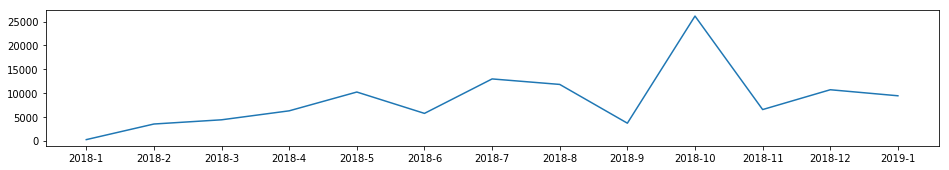

In [18]:
plt.figure(figsize=(16,2.5))
plt.plot(txndeb2['period'],txndeb2['Debit'])

In [19]:
txnd["period"] = txnd["year"].map(str) + '-' + txnd["month"].map("{:02}".format).map(str)
txnd

,Date,Activity,Wallet Txn ID,Debit,Credit,Status,year,month,period
0,2019-01-25 10:48:57,Paid For Order,22622343594,50.0,0.0,SUCCESS,2019,1,2019-01
1,2019-01-24 21:19:43,Cashback Received,22616506212,0.0,1.5,SUCCESS,2019,1,2019-01
2,2019-01-24 21:19:42,Paid For Order,22616506109,200.0,0.0,SUCCESS,2019,1,2019-01
3,2019-01-24 21:16:11,Added To Paytm Account,22616439149,0.0,1000.0,SUCCESS,2019,1,2019-01
4,2019-01-23 21:13:26,Paid For Order,22598910177,60.0,0.0,SUCCESS,2019,1,2019-01
5,2019-01-23 21:13:16,Added To Paytm Account,22598906847,0.0,10.0,SUCCESS,2019,1,2019-01
6,2019-01-23 10:29:10,Cashback Received,22587071130,0.0,50.0,SUCCESS,2019,1,2019-01
7,2019-01-23 10:29:09,Paid For Order,22587070826,55.0,0.0,SUCCESS,2019,1,2019-01
8,2019-01-23 10:29:07,Added To Paytm Account,22587070315,0.0,8.0,SUCCESS,2019,1,2019-01
9,2019-01-22 21:23:31,Paid For Order,22581647787,10.0,0.0,SUCCESS,2019,1,2019-01


In [20]:
txncon = txnd.drop(['year','month','Date'],axis = 1)
txncon

,Activity,Wallet Txn ID,Debit,Credit,Status,period
0,Paid For Order,22622343594,50.0,0.0,SUCCESS,2019-01
1,Cashback Received,22616506212,0.0,1.5,SUCCESS,2019-01
2,Paid For Order,22616506109,200.0,0.0,SUCCESS,2019-01
3,Added To Paytm Account,22616439149,0.0,1000.0,SUCCESS,2019-01
4,Paid For Order,22598910177,60.0,0.0,SUCCESS,2019-01
5,Added To Paytm Account,22598906847,0.0,10.0,SUCCESS,2019-01
6,Cashback Received,22587071130,0.0,50.0,SUCCESS,2019-01
7,Paid For Order,22587070826,55.0,0.0,SUCCESS,2019-01
8,Added To Paytm Account,22587070315,0.0,8.0,SUCCESS,2019-01
9,Paid For Order,22581647787,10.0,0.0,SUCCESS,2019-01


In [21]:
cashblst = txncon[txncon['Activity'] == 'Cashback Received']
cashblst
cashbsum = cashblst['Credit'].sum()
cashbsum

6884.13

In [22]:
creditlst = txncon[txncon['Activity'] != 'Cashback Received']
creditlst
creditsum = creditlst['Credit'].sum()
creditsum

103779.98

In [23]:
debitsum = txncon['Debit'].sum()
debitsum

111405.16

In [24]:
txnall =txncon
txnall

,Activity,Wallet Txn ID,Debit,Credit,Status,period
0,Paid For Order,22622343594,50.0,0.0,SUCCESS,2019-01
1,Cashback Received,22616506212,0.0,1.5,SUCCESS,2019-01
2,Paid For Order,22616506109,200.0,0.0,SUCCESS,2019-01
3,Added To Paytm Account,22616439149,0.0,1000.0,SUCCESS,2019-01
4,Paid For Order,22598910177,60.0,0.0,SUCCESS,2019-01
5,Added To Paytm Account,22598906847,0.0,10.0,SUCCESS,2019-01
6,Cashback Received,22587071130,0.0,50.0,SUCCESS,2019-01
7,Paid For Order,22587070826,55.0,0.0,SUCCESS,2019-01
8,Added To Paytm Account,22587070315,0.0,8.0,SUCCESS,2019-01
9,Paid For Order,22581647787,10.0,0.0,SUCCESS,2019-01


In [27]:
txnsub = txncon.drop(['Wallet Txn ID','Status'],axis = 1)
txnsub

,Activity,Debit,Credit,period
0,Paid For Order,50.0,0.0,2019-01
1,Cashback Received,0.0,1.5,2019-01
2,Paid For Order,200.0,0.0,2019-01
3,Added To Paytm Account,0.0,1000.0,2019-01
4,Paid For Order,60.0,0.0,2019-01
5,Added To Paytm Account,0.0,10.0,2019-01
6,Cashback Received,0.0,50.0,2019-01
7,Paid For Order,55.0,0.0,2019-01
8,Added To Paytm Account,0.0,8.0,2019-01
9,Paid For Order,10.0,0.0,2019-01


In [28]:
txngrp = txnsub.set_index(['period']).groupby(['period']).sum(axis=1).drop(['Activity'],axis = 1)
txngrp

,Debit,Credit
period,,
2018-01,200.00,1.50
2018-02,3480.08,3993.00
2018-03,4365.49,3738.50
2018-04,6252.11,5459.90
2018-05,10202.90,10456.38
2018-06,5715.00,7173.00
2018-07,12955.32,12828.62
2018-08,11801.08,10452.50
2018-09,3654.00,3359.00


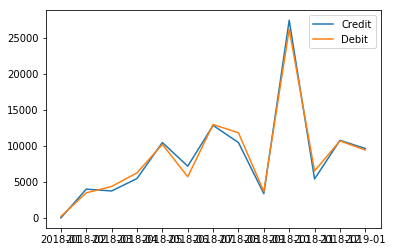

In [29]:
#plot of credit and debit details


transacs = ['Credit','Debit']

for tr in transacs:
    t = txngrp[tr]
    plt.plot(t.index,t.values)

plt.legend(transacs)

In [31]:
txncredit = txncon[txncon['Activity']!= 'Cashback Received'].set_index(['period']).drop(['Wallet Txn ID','Debit','Status'],axis = 1)
txncredit = txncredit.drop(['Activity'],axis=1).groupby(['period']).sum()
txncredit

,Credit
period,
2018-01,0.00
2018-02,3850.00
2018-03,3700.00
2018-04,4974.00
2018-05,10150.00
2018-06,6515.00
2018-07,11700.00
2018-08,9125.00
2018-09,3353.00


In [32]:
txncashback = txncon[txncon['Activity']== 'Cashback Received'].set_index(['period']).drop(['Wallet Txn ID','Debit','Status'],axis = 1)
txncashback = txncashback.drop(['Activity'],axis=1).groupby(['period']).sum()
txncashback

,Credit
period,
2018-01,1.50
2018-02,143.00
2018-03,38.50
2018-04,485.90
2018-05,306.38
2018-06,658.00
2018-07,1128.62
2018-08,1327.50
2018-09,6.00


In [33]:
txndebit = txncon.set_index(['period']).drop(['Activity','Wallet Txn ID','Credit','Status'],axis = 1)
txndebit = txndebit.groupby(['period']).sum()
txndebit

,Debit
period,
2018-01,200.00
2018-02,3480.08
2018-03,4365.49
2018-04,6252.11
2018-05,10202.90
2018-06,5715.00
2018-07,12955.32
2018-08,11801.08
2018-09,3654.00


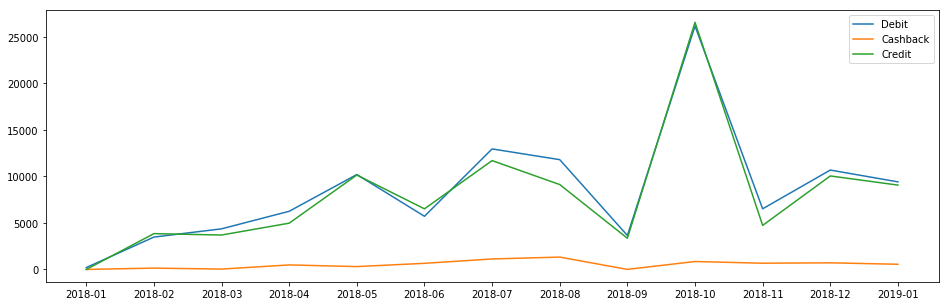

In [34]:
plt.figure(figsize=(16,5))
plt.plot(txndebit.index,txndebit.values)
plt.plot(txncashback.index,txncashback.values)
plt.plot(txncredit.index,txncredit.values)
plt.legend(['Debit','Cashback','Credit'])